<a href="https://colab.research.google.com/github/bleenee203/IS335.P11---SQLi/blob/main/EDA_%2B_Textpreprocressing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


__Read the dataset__

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/My Drive/Modified_SQL_Dataset.csv")

__Explore information from dataset__

In [7]:
def missing_values(data):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = data.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': missing_count.values / len(data) * 100
    })
    return  missing_percetanges

In [8]:
def explore_sample(sample):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    shape = pd.DataFrame(sample.shape)
    head = pd.DataFrame(sample.head())
    tail = pd.DataFrame(sample.tail())
    nunique = pd.DataFrame(sample.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(sample.describe())
    dtypes =  pd.DataFrame(sample.dtypes, columns=["Datatype"])
    results = {
        'Dataset shape:':shape,
        'Dataset Head:':head,
        'Dataset Tail:':tail,
        'Dataset Numerical Describtion: ':describe,
        'Missing Values By Percentage': missing_values(sample),
        'Dataset Columns Data types: ':dtypes,
        'Number of uniques in the datasets:':nunique}
    return results

In [9]:
def print_dataset_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [10]:
results = explore_sample(data)
print_dataset_exploration(results)

Dataset shape:


,0
0,30919
1,2


Dataset Head:


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


Dataset Tail:


,Query,Label
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0
30918,SELECT TOP 3 * FROM race,0


Dataset Numerical Describtion: 


,Label
count,30919.000000
mean,0.368123
std,0.482303
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Missing Values By Percentage
Total Sum of Missing Percetange:  0.0


,Column,Counts,Percentage
0,Query,0,0.0
1,Label,0,0.0


Dataset Columns Data types: 


,Datatype
Query,object
Label,int64


Number of uniques in the datasets:


,#_of_Unique
Query,30905
Label,2


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Column').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Counts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Counts'}, axis=1)
              .sort_values('Counts', ascending=True))
  xs = counted['Counts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Counts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Column')):
  _plot_series(series, series_name, i)
  fig.legend(title='Column', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Counts')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Percentage']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Percentage'}, axis=1)
              .sort_values('Percentage', ascending=True))
  xs = counted['Percentage']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Percentage', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Column')):
  _plot_series(series, series_name, i)
  fig.legend(title='Column', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Percentage')
_ = plt.ylabel('count()')

Print the existing tables in the payload.

In [11]:
from_values = data[data.Query.str.contains('from')]
l = list(from_values.Query)

tables = []
for i in l:
    x = i[i.index('from')+5:].split(' ')
    if x[0] not in tables and len(x[0]) > 1:
        tables.append(x[0])
print(tables)

['users', 'syscolumns', 'sysobjects', 'information_schema.tables--', 'temp', 'tabname', 'where', 'information_schema.tables;', 'tablenames', 'wapiti', 'generate_series', 'information_schema.character_sets', 'dual', 'pg_sleep', 'all_users', 'sysibm.systables', 'rdb$database', 'sysusers', 'mysql.db', 'domain.domains', 'rdb$fields', 'master..sysdatabases', 'information_schema.system_users', 'dual--', 'dual#', 'WHERE', 'ROM', 'JOIN']


In [12]:
data.duplicated().any()

True

Remove duplicate rows

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().any()

False

In [15]:
data.duplicated(subset=['Query'],keep=False).sum()

4

Remove same query with different label

In [16]:
data.drop_duplicates(subset=['Query'], keep=False, inplace=True)

In [17]:
data.duplicated(subset=['Query'],keep=False).sum()

0

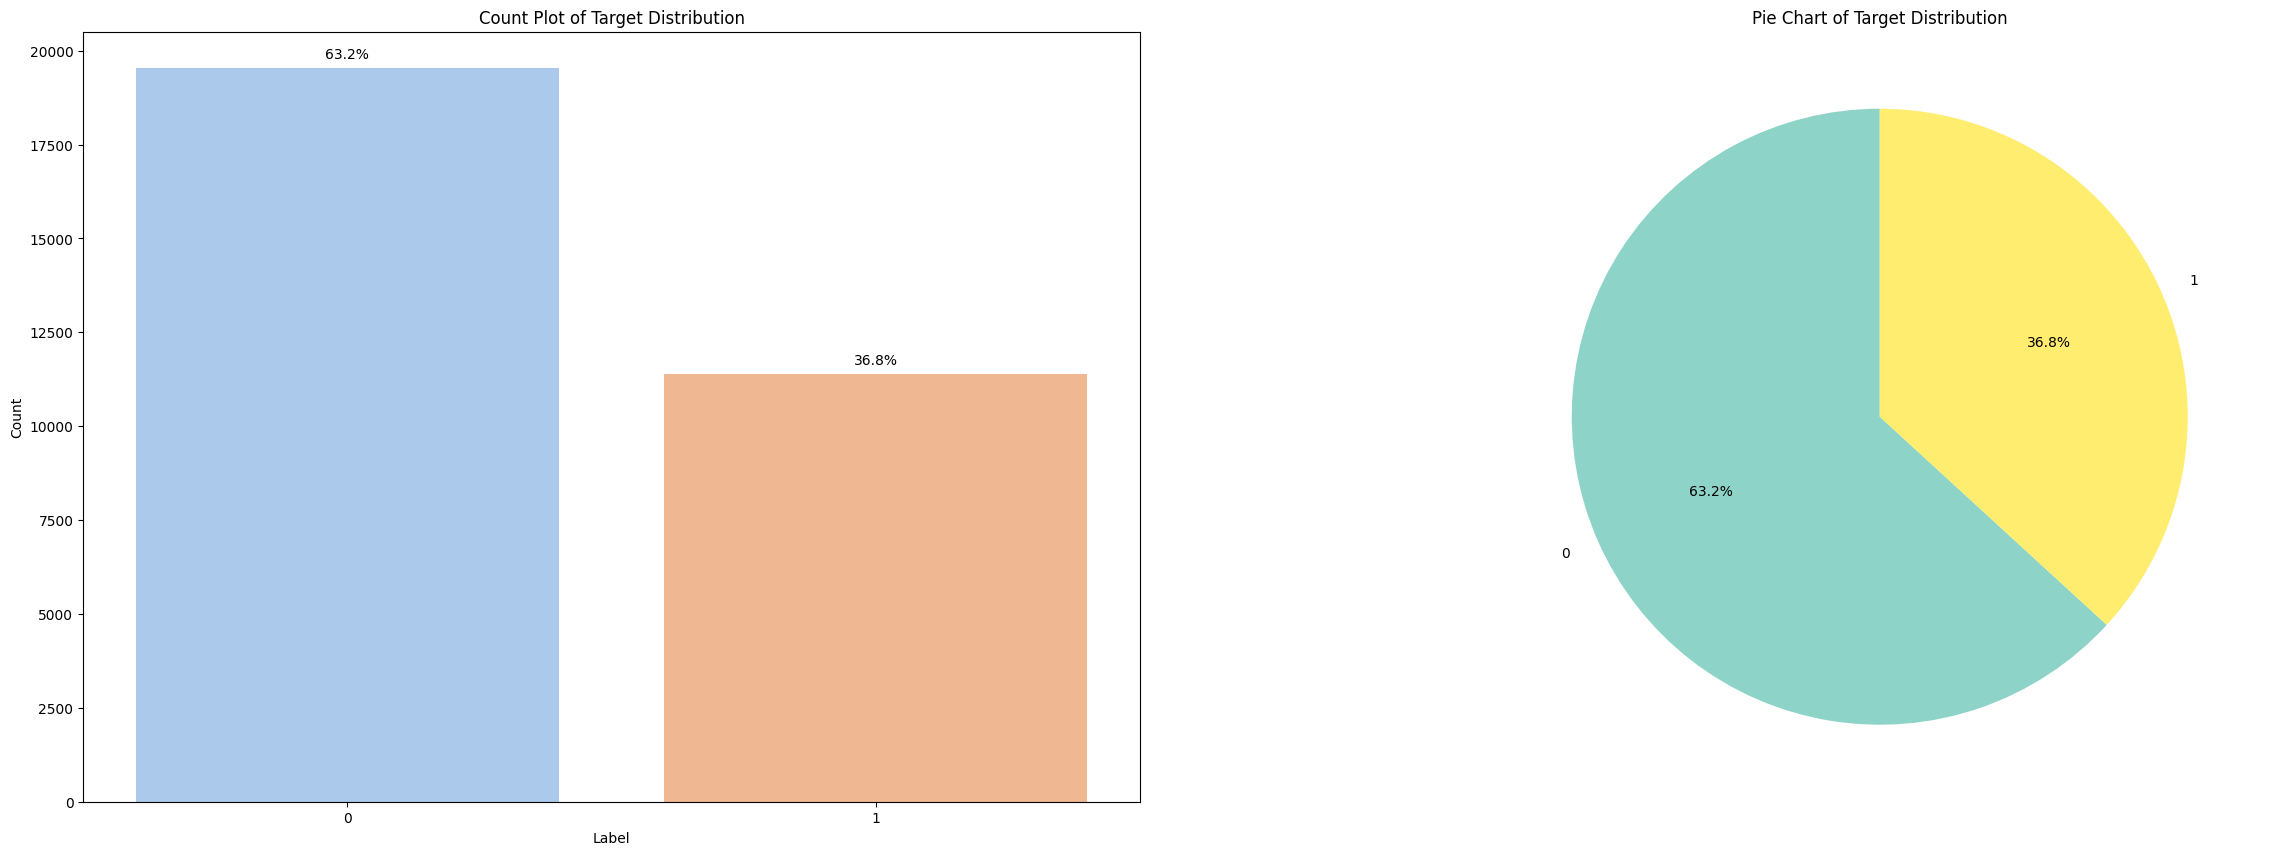

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(30, 10))

# First subplot: Countplot for target distribution
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Label', data=data,palette='pastel')
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format(100 * p.get_height() / len(data)),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points')

ax1.set_title('Count Plot of Target Distribution')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')

# Second subplot: Pie chart for target distribution
plt.subplot(1, 2, 2)
ax2 = data['Label'].value_counts().plot(kind='pie', colormap='Set3', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide y-label in pie chart
plt.title('Pie Chart of Target Distribution')

# Display the plots
plt.show()


How many comments symbols are in the payloads ?

In [19]:
comment_values = data[data.Query.str.contains('#|--|//')]
comment_values.count()[0]

5925

All frequencies, including STOPWORDS:
        Frequency
Word             
)           50877
(           45822
select      22783
=           17808
,           17640
from        16342
'           15407
*            9957
1            9819
where        8357


<Axes: xlabel='Word'>

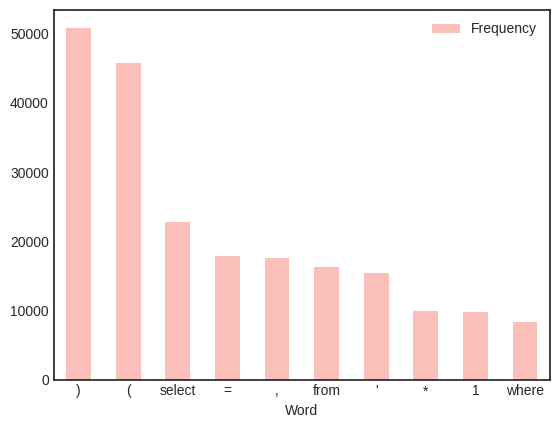

In [20]:
top_N = 10

payloads = data.Query.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(payloads)
word_dist = nltk.FreqDist(words)


print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

matplotlib.style.use('seaborn-v0_8-white')

rslt.plot.bar(rot=0, alpha=0.85, colormap='Pastel1')

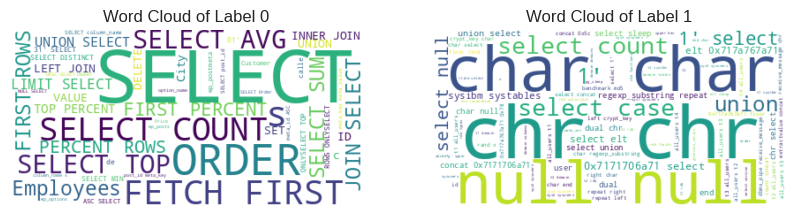

In [21]:
data_label_0 = data[data['Label'] == 0]
words_label_0 = ' '.join(data_label_0['Query'].dropna())

data_label_1 = data[data['Label'] == 1]
words_label_1 = ' '.join(data_label_1['Query'].dropna())

wordcloud_0 = WordCloud(background_color='white').generate(words_label_0)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud of Label 0')
plt.axis('off')

wordcloud_1 = WordCloud(background_color='white').generate(words_label_1)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud of Label 1')
plt.axis('off')

plt.show()


Nhận xét:
Các từ khóa xuất hiện thường thuyên trong các câu lệnh SQL bình thường gồm: SELECT, ORDER, TOP, AVG, JOIN, COUNT,v.v
Các từ khóa xuất hiện thường xuyên trong các câu lệnh SQL Injection gồm: null, char, chr, union, select, case, count,v.v

__Feature Extraction__

In [22]:
harmful_keywords = ['DROP', 'TRUNCATE', 'DELETE', 'SHUTDOWN','SLEEP ']
# Số dấu nháy đơn trong câu truy vấn
def single_qt(x):
    return len(re.findall(r"'", x))
data['no_sngle_quts'] = data['Query'].apply(single_qt)

# Số dấu nháy kép trong câu truy vấn
def double_qt(x):
    return len(re.findall(r'"', x))
data['no_dble_quts'] = data['Query'].apply(double_qt)

# Số lượng dấu câu trong câu truy vấn
def punctuation(x):
    r = re.compile("[!\"#$%&\'()*+,-.\/:;<=>?@[\\]^_`{|}~]")
    l = r.findall(x)
    return len(l)
data['no_punctn'] = data['Query'].apply(punctuation)

# Số dòng comment đơn trong câu truy vấn
def sin_comm(x):
    return len(re.findall(r'(--)', x))
data['no_sgle_cmnt'] = data['Query'].apply(sin_comm)

# Số lượng comment đa dòng
def mult_comm(x):
    return len(re.findall(r'(\/\*)', x))
data['no_mlt_cmnt'] = data['Query'].apply(mult_comm)

# Tổng số lượng toán tử logic trong câu truy vấn
def logical(x):
    return len(re.findall(r'\snot\s|\sand\s|\sor\s|\sxor\s|&&|\|\||!', x))
data['no_log_oprtr'] = data['Query'].apply(logical)

# Tổng số lần xuất hiện của các từ khóa gây hại trong câu truy vấn
def harmful_keyword_count(x):
    return sum([x.upper().count(kw) for kw in harmful_keywords])
data['harmful_keywords'] = data['Query'].apply(harmful_keyword_count)

# Tổng số lần xuất hiện của các ký tự đặc biệt trong truy vấn
def special_characters(x):
    return len(re.findall(r'[^\w\s]', x))
data['no_spl_chrtr'] = data['Query'].apply(special_characters)
data.head(50)

,Query,Label,no_sngle_quts,no_dble_quts,no_punctn,no_sgle_cmnt,no_mlt_cmnt,no_log_oprtr,harmful_keywords,no_spl_chrtr
0,""" or pg_sleep ( __TIME__ ) --",1,0,1,10,1,0,1,1,5
1,create user name identified by pass123 tempora...,1,0,0,1,0,0,0,0,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1,3,0,25,0,0,0,0,19
3,select * from users where id = '1' or @ @1 ...,1,3,0,13,1,0,1,0,13
4,"select * from users where id = 1 or 1#"" ( ...",1,0,1,10,1,0,1,0,10
5,select name from syscolumns where id = ...,1,1,0,7,1,0,0,0,7
6,select * from users where id = 1 +$+ or 1 =...,1,0,0,8,1,0,1,0,8
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,0,0,22,0,0,0,0,21
8,select * from users where id = '1' or ||/1 ...,1,3,0,14,1,0,2,0,14
9,select * from users where id = '1' or \.<\ ...,1,3,0,12,1,0,1,0,14


<Figure size 1000x600 with 0 Axes>

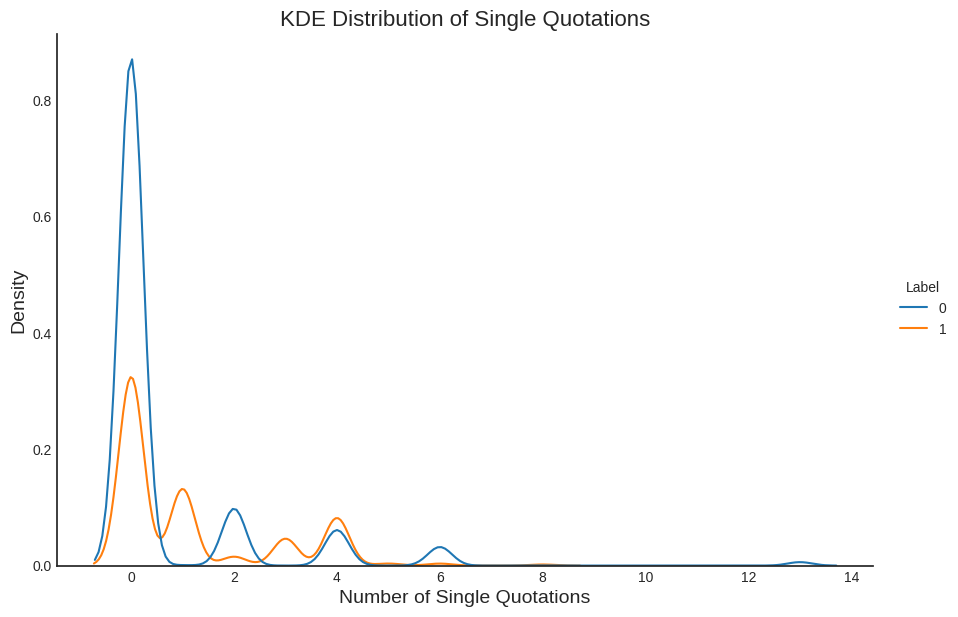

In [23]:
plt.figure(figsize=(10, 6))

sns.displot(data=data, x="no_sngle_quts", hue="Label", kind="kde", height=6, aspect=1.5)

plt.title('KDE Distribution of Single Quotations', fontsize=16)
plt.xlabel('Number of Single Quotations', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

Nhận xét: Với những truy vấn chứa 0 hoặc 2 dấu nháy đơn thì có khả năng truy vấn đó là truy vấn hợp lệ. Ngược lại với những truy vấn chứa 1 hoặc 3 dấu nháy đơn thì có khả năng truy vấn đó là truy vấn có thể bị tấn công.

<Figure size 1000x600 with 0 Axes>

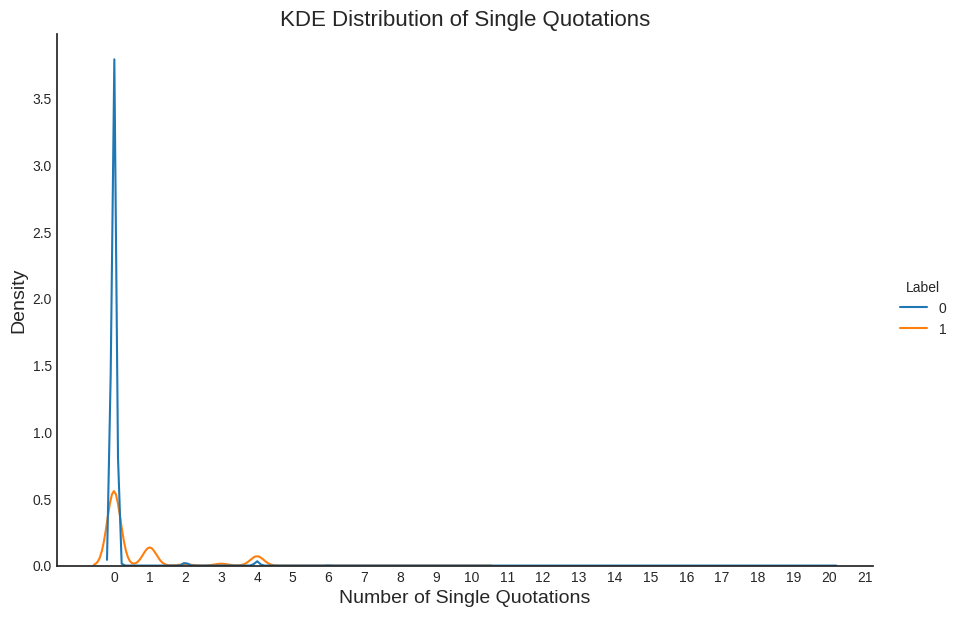

In [24]:
plt.figure(figsize=(10, 6))

sns.displot(data=data, x="no_dble_quts", hue="Label", kind="kde", height=6, aspect=1.5)
plt.xticks(range(0, int(data['no_dble_quts'].max()) + 2, 1))
plt.title('KDE Distribution of Single Quotations', fontsize=16)
plt.xlabel('Number of Single Quotations', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

Nhận xét: Với những truy vấn không chứa dấu nháy đơn thì có khả năng đó là những truy vấn hợp lệ, ngược lại với những truy vấn chứa 1 dấu nháy đơn thì có khả năng chúng là những truy vấn độc hại.

<Figure size 1000x600 with 0 Axes>

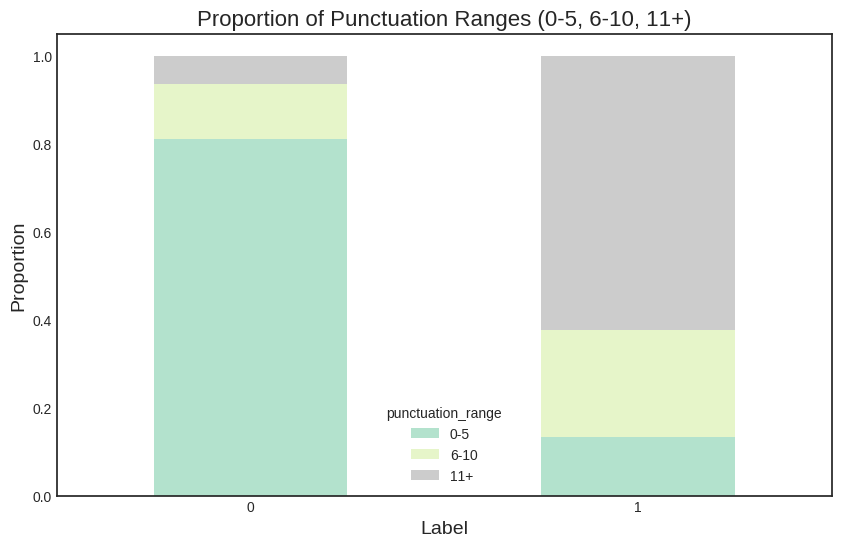

In [25]:
bins = [0, 5, 10, data['no_punctn'].max()]
labels = ['0-5', '6-10', '11+']
data['punctuation_range'] = pd.cut(data['no_punctn'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))

punctuation_counts = data.groupby(['Label', 'punctuation_range']).size().unstack(fill_value=0)
punctuation_counts.div(punctuation_counts.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Pastel2")

plt.title('Proportion of Punctuation Ranges (0-5, 6-10, 11+)', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0)

plt.show()

Nhận xét: Số dấu câu tăng lên đồng nghĩa với việc truy vấn có khả năng là injection query.

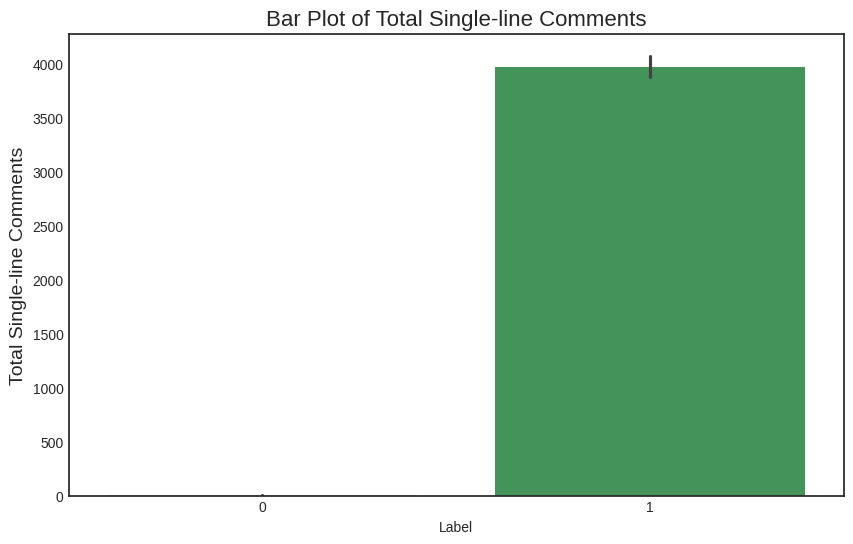

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Label", y="no_sgle_cmnt", estimator=sum,palette="Greens")
plt.title('Bar Plot of Total Single-line Comments', fontsize=16)
plt.ylabel('Total Single-line Comments', fontsize=14)
plt.show()

Nhận xét:  Truy vấn có single-line comment đều là SQL Injection.

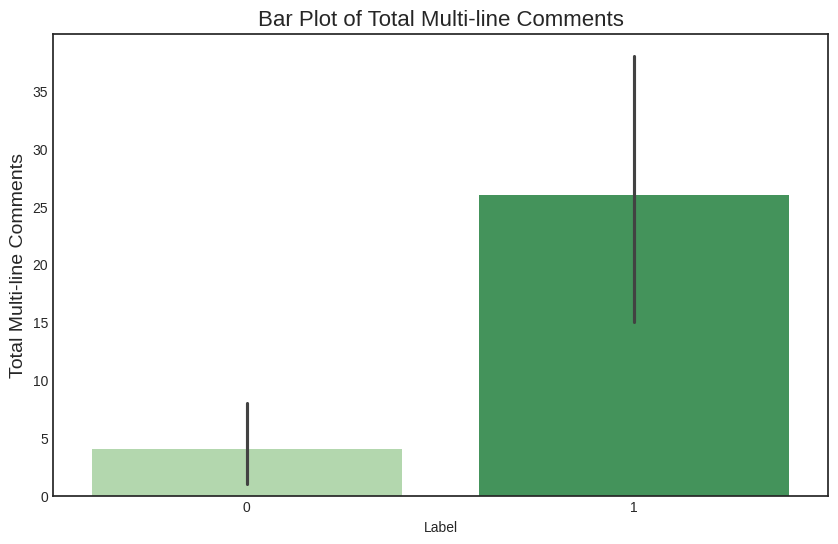

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Label", y="no_mlt_cmnt", estimator=sum,palette="Greens")
plt.title('Bar Plot of Total Multi-line Comments', fontsize=16)
plt.ylabel('Total Multi-line Comments', fontsize=14)
plt.show()

Nhận xét:Multi-line comment ít xuất hiện trong các truy vấn thông thường và thường có xu hướng xuất hiện ở trong các truy vấn SQL injection

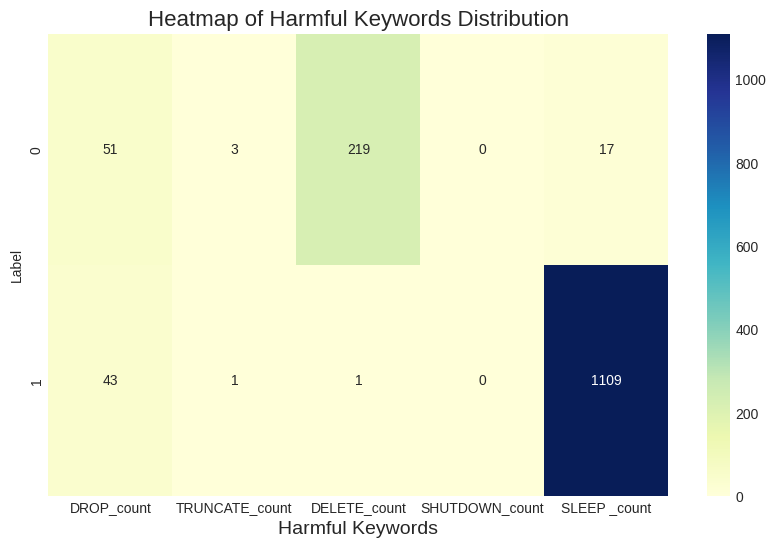

In [28]:

for kw in harmful_keywords:
    data[f'{kw}_count'] = data['Query'].apply(lambda query: query.upper().count(kw))

harmful_keyword_columns = [f'{kw}_count' for kw in harmful_keywords]
harmful_keywords_data = data.groupby('Label')[harmful_keyword_columns].sum()

plt.figure(figsize=(10, 6))
sns.heatmap(harmful_keywords_data, annot=True, cmap="YlGnBu", fmt='g')

plt.title('Heatmap of Harmful Keywords Distribution', fontsize=16)
plt.xlabel('Harmful Keywords', fontsize=14)

plt.show()


Nhận xét: Các cuộc tấn công SQL Injection sử dụng từ khóa SLEEP rất phổ biến, cho thấy kiểu tấn công time-based chiếm ưu thế, trong khi các từ khóa như DELETE và DROP có thể xuất hiện cả trong câu truy vấn thông thường và SQL Injection.

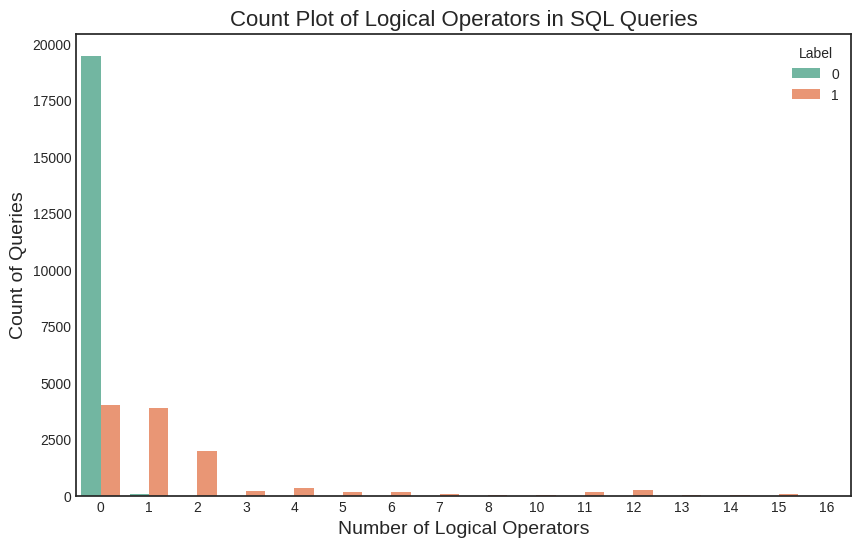

In [29]:
plt.figure(figsize=(10, 6))

sns.countplot(data=data, x="no_log_oprtr", hue="Label", palette="Set2")

plt.title('Count Plot of Logical Operators in SQL Queries', fontsize=16)
plt.xlabel('Number of Logical Operators', fontsize=14)
plt.ylabel('Count of Queries', fontsize=14)

plt.show()


Nhận xét:
Các truy vấn có xu hướng sử dụng rất ít hoặc không sử dụng các toán tử logic.
Các truy vấn Injection thường sử dụng từ 1 đến 2 toán tử logic để tạo ra các điều kiện phức tạp hơn nhằm khai thác cơ sở dữ liệu. Đáng chú ý, không có nhiều truy vấn với số lượng lớn hơn 2 toán tử logic, điều này cho thấy các tấn công SQL Injection thường giới hạn số lượng toán tử được sử dụng để tránh bị phát hiện.

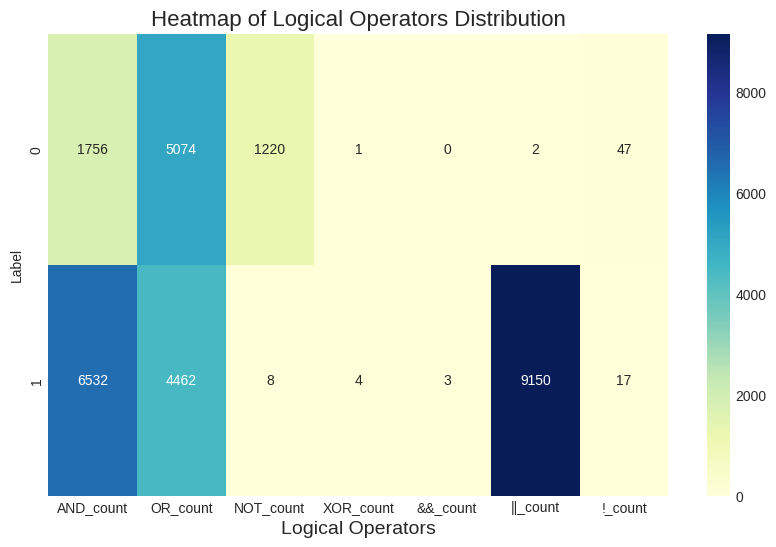

In [30]:
logical_operators = ['AND', 'OR', 'NOT', 'XOR', '&&', '||', '!']
for op in logical_operators:
    data[f'{op}_count'] = data['Query'].apply(lambda query: query.upper().count(op))

logical_op_columns = [f'{op}_count' for op in logical_operators]
logical_op_data = data.groupby('Label')[logical_op_columns].sum()

plt.figure(figsize=(10, 6))
sns.heatmap(logical_op_data, annot=True, cmap="YlGnBu", fmt='g')

plt.title('Heatmap of Logical Operators Distribution', fontsize=16)
plt.xlabel('Logical Operators', fontsize=14)

plt.show()

Nhận xét: Các toán tử AND, || được sử dụng với tần suất rất cao, điều này cho thấy kẻ tấn công thường sử dụng các toán tử này để tạo ra các điều kiện phức tạp nhằm khai thác cơ sở dữ liệu.

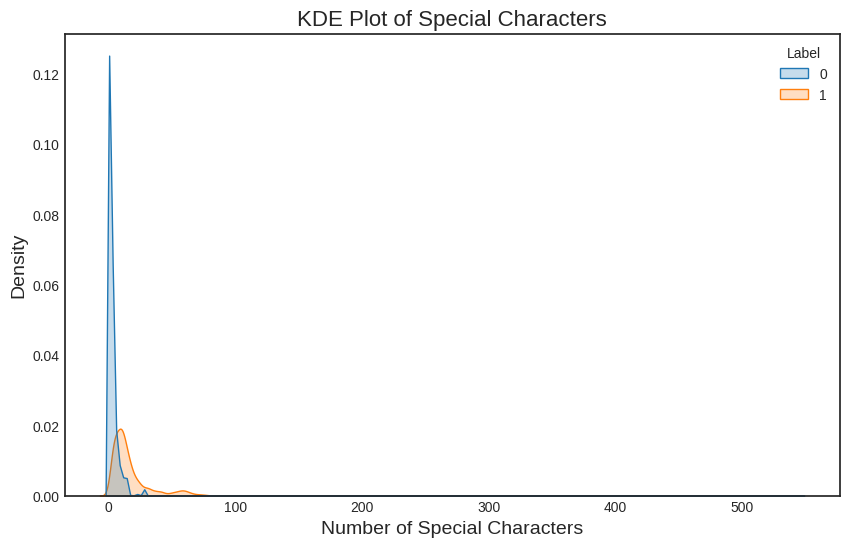

In [31]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=data, x="no_spl_chrtr", hue="Label", fill=True)

plt.title('KDE Plot of Special Characters', fontsize=16)
plt.xlabel('Number of Special Characters', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

Nhận xét: Các truy vấn SQL Injection có mật độ cao hơn ở vùng có số lượng ký tự đặc biệt lớn hơn(20 đến hơn 100 ký tự đặc biệt). Điều này cho thấy rằng các truy vấn tấn công SQL Injection thường chứa nhiều ký tự đặc biệt hơn. Ngược lại, ở những truy vấn không có ký tự đặc biệt thì hầu hết đều là truy vấn an toàn.

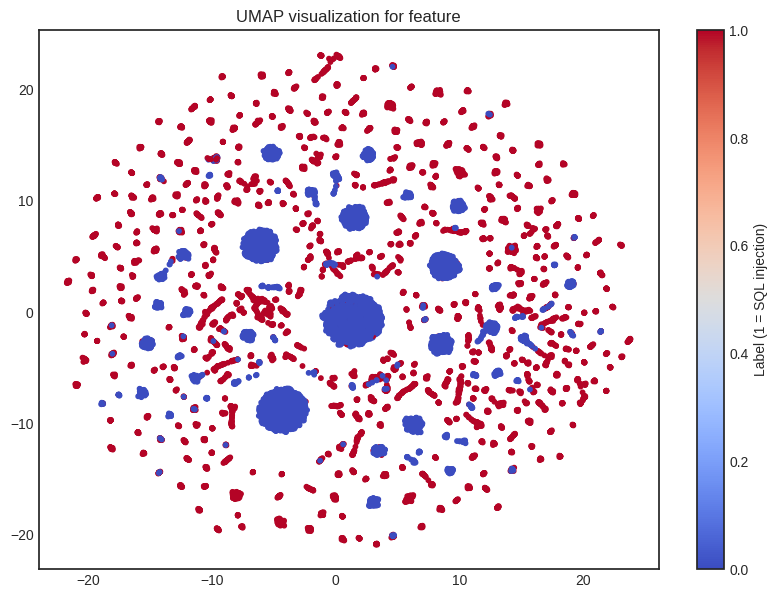

In [32]:
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt


features = data[['no_sngle_quts', 'no_dble_quts', 'no_punctn', 'no_sgle_cmnt',
                 'no_mlt_cmnt', 'no_log_oprtr', 'harmful_keywords', 'no_spl_chrtr']]

# Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.5, random_state=42)
umap_embedding = umap_model.fit_transform(scaled_features)

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=data['Label'], cmap='coolwarm', s=10)
plt.title("UMAP visualization for feature")
plt.colorbar(label='Label (1 = SQL injection)')
plt.show()


Nhận xét: Mặc dù đồ thị có các điểm chồng lắp nhưng hầu hết các nhãn đều phân biệt.

In [33]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import word2vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [34]:
#printing some random variable
sent_0 = data['Query'].values[0]
print(sent_0)
print("="*50)

sent_2000 = data['Query'].values[2000]
print(sent_2000)
print("="*50)

sent_15000 = data['Query'].values[15000]
print(sent_15000)
print("="*50)

sent_20000 = data['Query'].values[20000]
print(sent_20000)
print("="*50)

" or pg_sleep  (  __TIME__  )  --
1   )    )     )   or exp  (  ~  (  select * from   (  select concat  (  0x7171706a71,  (  select   (  elt  (  6270  =  6270,1   )    )     )  ,0x717a767a71,0x78   )    )   x   )    )    and    (    (     (  2230  =  2230
6173
  SELECT SUBSTRING_INDEX ( "www.w3schools.com", ".", 1 ) ;


In [35]:
#remove the special Character :  https://stackoverflow.com/a/5843547/4084039
sent_15000 = re.sub('[^A-Za-z0-9]+',' ',sent_15000)
print(sent_15000)

6173


In [36]:
sent_20000 = re.sub('[^A-Za-z0-9]+',' ',sent_20000)
print(sent_20000)

 SELECT SUBSTRING INDEX www w3schools com 1 


Stop words are common words that will likely appear in any text. Which we need to remove.

E.g.: silver or lead is fine for me -> silver, lead, fine.

In [37]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [38]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_query = []
lemmatizer = WordNetLemmatizer()
# tqdm is for printing the status bar
for sentance in tqdm(data['Query'].values):
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = re.sub(r',', ' ', sentance)
    #https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    tokenization = nltk.word_tokenize(sentance)
    sentance = ' '.join([lemmatizer.lemmatize(w) for w in tokenization])
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_query.append(sentance.strip())

100%|██████████| 30903/30903 [00:07<00:00, 3884.54it/s]


In [39]:
preprocessed_query

['pg sleep time',
 'create user name identified pass123 temporary tablespace temp default tablespace user',
 '1 utl inaddr get host address select distinct table name select distinct table name rownum limit sys table limit 5',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 1 union select 1 version 1',
 'select name syscolumns id select id sysobjects name tablename',
 'select user id 1 1 1 1',
 '1 load file char 47 101 116 99 47 112 97 115 115 119 100 1 1 1',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 union select 1 version 1',
 '1 1',
 '',
 'admin 1 1',
 'select user id 1 1 1 1',
 '1 1',
 '1 utl inaddr get host address select distinct column name select distinct column name rownum limit tab column limit 5',
 'select user id 1 union select 1 version 1',
 'select user id 1 1 1 1',
 'select user id 1 1 1 1',
 'distinct',
 'select user id 1 1 1 1',
 '1 ascii lower substring select top 1 name sysobjects xtype u 1 1 116',
 'select user id 1 1 1

In [40]:
data['Query'] = preprocessed_query

In [41]:
data.head()

,Query,Label,no_sngle_quts,no_dble_quts,no_punctn,no_sgle_cmnt,no_mlt_cmnt,no_log_oprtr,harmful_keywords,no_spl_chrtr,...,DELETE_count,SHUTDOWN_count,SLEEP _count,AND_count,OR_count,NOT_count,XOR_count,&&_count,||_count,!_count
0,pg sleep time,1,0,1,10,1,0,1,1,5,...,0,0,1,0,1,0,0,0,0,0
1,create user name identified pass123 temporary ...,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1 utl inaddr get host address select distinct ...,1,3,0,25,0,0,0,0,19,...,0,0,0,2,0,0,0,0,0,0
3,select user id 1 1 1 union select 1 version 1,1,3,0,13,1,0,1,0,13,...,0,0,0,0,1,0,0,0,0,0
4,select user id 1 1 union select 1 version 1,1,0,1,10,1,0,1,0,10,...,0,0,0,0,1,0,0,0,0,0


Bag-of-words(BOW) hay Count Vectorizer thể hiện sự xuất hiện của các từ trong dữ liệu. Trả về 1 nếu có xuất hiện và 0 nếu không xuất hiện.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming `preprocessed_query` is a list of preprocessed text data (as shown in the PDF)
# Example: preprocessed_query = ["pg sleep time", "create user pass123"]

# Initialize the CountVectorizer
count_vect = CountVectorizer()

# Fit and transform the preprocessed data into a Bag-of-Words representation
X_train_counts = count_vect.fit_transform(preprocessed_query)

# Get the feature names (words)
feature_names = count_vect.get_feature_names_out()

# Display some feature names and shape of the matrix
print(f"Feature names (first 10): {feature_names[:10]}")
print(f"Shape of the feature matrix: {X_train_counts.shape}")

# Convert the BoW representation to a DataFrame for better visualization
bow_df = pd.DataFrame(X_train_counts.toarray(), columns=feature_names)
print(bow_df.head(10))


Feature names (first 10): ['00' '000001' '000003' '000004' '000023' '000045' '00033926r' '00041731d'
 '00207473j' '00217e']
Shape of the feature matrix: (30903, 24462)
   00  000001  000003  000004  000023  000045  00033926r  00041731d  \
0   0       0       0       0       0       0          0          0   
1   0       0       0       0       0       0          0          0   
2   0       0       0       0       0       0          0          0   
3   0       0       0       0       0       0          0          0   
4   0       0       0       0       0       0          0          0   
5   0       0       0       0       0       0          0          0   
6   0       0       0       0       0       0          0          0   
7   0       0       0       0       0       0          0          0   
8   0       0       0       0       0       0          0          0   
9   0       0       0       0       0       0          0          0   

   00207473j  00217e  ...  zytel  zyuo  zyvk  zzca

Ma trận BOW trả về 30903 dòng (tương ứng với số lượng tài liệu hoặc câu hỏi trong tập dữ liệu) và 24462 từ độc nhất trong dataset.

N-grams: tập hợp các từ hoặc ký tự liền kề có độ dài n có thể tìm thấy trong văn bản gốc.

Unigrams: N-grams với n = 1
Bigrams: N-grams với n = 2
Trigrams: N-grams với n = 3


In [43]:
# Initialize the CountVectorizer with bi-gram range (1,2) and other parameters
count_vect = CountVectorizer(ngram_range=(1, 2), min_df=10, max_features=5000)

# Fit and transform the preprocessed data
final_bigram_counts = count_vect.fit_transform(preprocessed_query)

# Display the type of the output
print("The type of count vectorizer:", type(final_bigram_counts))

# Display the shape of the resulting BoW vectorizer
print("The shape of our text BOW vectorizer:", final_bigram_counts.shape)

# Get feature names (bi-grams)
feature_names = count_vect.get_feature_names_out()
print(f"Feature names (first 10): {feature_names[:10]}")

The type of count vectorizer: <class 'scipy.sparse._csr.csr_matrix'>
The shape of our text BOW vectorizer: (30903, 2930)
Feature names (first 10): ['01' '01 1996' '06' '06 15' '07' '07 01' '07 31' '09' '09 34' '0x28']


Ma trận BoW có 30,903 dòng (tương ứng với số lượng tài liệu hoặc câu hỏi trong tập dữ liệu) và 2,930 cột (tương ứng với số lượng bigram khác nhau được chọn lọc).
Số lượng bigram=2,930 là do ta chỉ giữ lại những bigram xuất hiện ít nhất 10 lần trong toàn bộ tập dữ liệu (tham số min_df=10)

